<a href="https://colab.research.google.com/github/oneoclockc/makerere-fall-armyworm-crop-challenge/blob/main/Makerere_Fall_Armyworm_Crop_Challenge_%EC%9C%A4%ED%95%9C%EC%84%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Images.zip

Archive:  /content/drive/MyDrive/Images.zip
  inflating: Images/id_mpj645unlvb6k.jpg  
  inflating: Images/id_vf7jjnjt3i9u7.jpg  
  inflating: Images/id_me3ikxbvg1pdv.jpg  
  inflating: Images/id_vhbqipasvp2ja.jpg  
  inflating: Images/id_lp4lvg9kqqsdm.jpg  
  inflating: Images/id_5k9hpwihkzlib.jpg  
  inflating: Images/id_dphuozuvmo8x6.jpg  
  inflating: Images/id_zsts4k0kqtywj.jpg  
  inflating: Images/id_jgpf07teyj9q9.jpg  
  inflating: Images/id_e5ojnfaxfdcst.jpg  
  inflating: Images/id_uzzds6sqaqi0m.jpg  
  inflating: Images/id_pthnvt4do806c.jpg  
  inflating: Images/id_jyja425z3qiom.jpg  
  inflating: Images/id_mams7qouneq3j.jpg  
  inflating: Images/id_4xfzmmgfc171g.jpg  
  inflating: Images/id_3vf4bxm7i4m5r.jpg  
  inflating: Images/id_0r2hd8hfafwbn.jpg  
  inflating: Images/id_7ihrnacrl4xz5.jpg  
  inflating: Images/id_3xyaaakk3g6qi.jpg  
  inflating: Images/id_zz9lwehh5sxdp.jpg  
  inflating: Images/id_3id4xvc3bdt0k.jpg  
  inflating: Images/id_tsgmslybhuxru.jpg  
  inflatin

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/Images") 
new_base_dir = pathlib.Path("/content/윤한세") 

In [ ]:
import pandas as pd 
df = pd.read_csv("/content/drive/MyDrive/딥러닝_공모전/Train.csv")

In [ ]:
df_pest = df[df["Label"] == 1] 
df_nopest = df[df["Label"] == 0]

In [ ]:
print(len(df_nopest))
print(len(df_pest))
# balanced data, tatol 1619 training set 

810
809


In [ ]:
file_names = os.listdir(original_dir)

In [ ]:
num = 0
for name in file_names :
  for i in df_pest["Image_id"] :
    if name == i :
      src = os.path.join(original_dir, name)
      dst = 'pest'+ str(num) + '.jpg'
      dst = os.path.join(original_dir, dst)
      os.rename(src, dst)
      num += 1 # 파일 이름 바꾸기 - pest

In [ ]:
num = 0
for name in file_names :
  for i in df_nopest["Image_id"] :
    if name == i :
      src = os.path.join(original_dir, name)
      dst = 'nopest'+ str(num) + '.jpg'
      dst = os.path.join(original_dir, dst)
      os.rename(src, dst)
      num += 1 # 파일 이름 바꾸기 - nopest

In [ ]:
file_names = os.listdir(original_dir)
file_names # train에 속한 것들은 모두 이름 변경 완료 

['pest61.jpg',
 'pest67.jpg',
 'pest679.jpg',
 'id_sfvcij8ne337l.jpg',
 'nopest319.jpg',
 'nopest65.jpg',
 'pest276.jpg',
 'nopest211.jpg',
 'id_bd5ri69rptqug.jpg',
 'nopest74.jpg',
 'nopest576.jpg',
 'id_6fg87l8h3ka10.jpg',
 'nopest667.jpg',
 'id_v1jpjln5wvu4b.jpg',
 'pest803.jpg',
 'id_sn8p1ituhofx4.jpg',
 'id_75g2ut71g3uzi.jpg',
 'nopest343.jpg',
 'nopest534.jpg',
 'id_ao0s59swr97at.jpg',
 'id_whzmoee1m9nwc.jpg',
 'nopest750.jpg',
 'pest596.jpg',
 'id_l1ixknyd0j65l.jpg',
 'nopest188.jpg',
 'pest506.jpg',
 'id_rpfpq3fkrppqu.jpg',
 'id_dkzvwmnm20lcm.jpg',
 'pest8.jpg',
 'pest278.jpg',
 'pest287.jpg',
 'id_5yumb1f3akbih.jpg',
 'id_o21uilop3dllb.jpg',
 'pest95.jpg',
 'id_u8l2shzgw06eu.jpg',
 'id_eeh0s4d3ykqbl.jpg',
 'nopest748.jpg',
 'id_9stj11h5sb6nq.jpg',
 'nopest643.jpg',
 'id_l9wgku4lvd4ai.jpg',
 'nopest116.jpg',
 'pest417.jpg',
 'id_u5cgdvspkcd1t.jpg',
 'id_2nbeko5u3hdrc.jpg',
 'id_lwyyb50ndnf03.jpg',
 'id_cef99yakuap4i.jpg',
 'id_h3icuz5rujzmo.jpg',
 'id_urfj0q60utk0l.jpg',
 'pest

In [ ]:
def make_subset(subset_name, start_index, end_index):
    for category in ("pest", "nopest"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir) # 폴더 생성
        
        fnames = [f"{category}{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.move(src=original_dir / fname,
                            dst=dir / fname)

In [ ]:
# 600*2 training set, 209*2 validation set 
make_subset("train", start_index=0, end_index=600) # training set 600개
make_subset("validation", start_index=600, end_index=809) # validation set 809개 

In [ ]:
shutil.move(src=original_dir, dst= new_base_dir / "test" / "testset") # train/validation에 포함되지 않은 이미지를 testset으로 이동

PosixPath('/content/윤한세/test/testset')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
%matplotlib inline

In [ ]:
im1 = cv2.imread("/content/drive/MyDrive/딥러닝_공모전/윤한세/train/nopest/nopest0.jpg")
im2 = cv2.imread("/content/drive/MyDrive/딥러닝_공모전/윤한세/train/pest/pest1.jpg")

Text(0.5, 0, '(1024, 768, 3)')

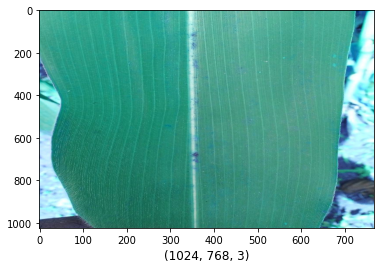

In [ ]:
plt.imshow(im1, aspect='auto')
plt.xlabel(f'{im1.shape}', fontsize=12)

Text(0.5, 0, '(1024, 768, 3)')

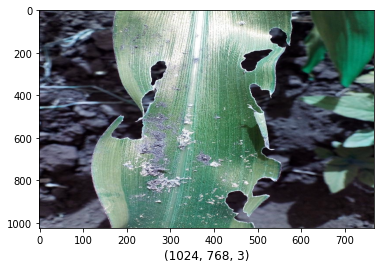

In [ ]:
plt.imshow(im2, aspect='auto')
plt.xlabel(f'{im2.shape}', fontsize=12)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory( # train dataset 생성(1200개)
    new_base_dir / "train",
    shuffle=True,
    image_size=(224, 224),
    batch_size=32)
validation_dataset = image_dataset_from_directory( # validation dataset 생성(418개)
    new_base_dir / "validation",
    shuffle=True,
    image_size=(224, 224),
    batch_size=32)

Found 1200 files belonging to 2 classes.
Found 418 files belonging to 2 classes.


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

# 배치 1을 가져와 확인
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50

In [ ]:
from keras.preprocessing import image
tf.keras.applications.resnet50.preprocess_input # resnet 이미지 전처리 함수? 

<function keras.applications.resnet.preprocess_input>

In [ ]:
resnet = ResNet50(include_top = False, weights= 'imagenet', input_shape=(224,224,3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
resnet.trainable = False # convolution 레이어 얼리기

In [ ]:
data_augmentation = keras.Sequential( # 데이터 증식
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

In [ ]:
# 모델링
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.resnet50.preprocess_input(x)
x = resnet(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                      

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["AUC"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks) 

Epoch 1/30
38/38 [==============================] - 26s 275ms/step - loss: 0.4956 - auc: 0.8426 - val_loss: 0.1644 - val_auc: 0.9912
Epoch 2/30
38/38 [==============================] - 10s 234ms/step - loss: 0.1886 - auc: 0.9836 - val_loss: 0.1083 - val_auc: 0.9942
Epoch 3/30
38/38 [==============================] - 10s 225ms/step - loss: 0.1158 - auc: 0.9943 - val_loss: 0.1009 - val_auc: 0.9946
Epoch 4/30
38/38 [==============================] - 10s 223ms/step - loss: 0.0962 - auc: 0.9951 - val_loss: 0.0854 - val_auc: 0.9955
Epoch 5/30
38/38 [==============================] - 12s 299ms/step - loss: 0.0902 - auc: 0.9954 - val_loss: 0.0820 - val_auc: 0.9959
Epoch 6/30
38/38 [==============================] - 10s 226ms/step - loss: 0.0780 - auc: 0.9961 - val_loss: 0.0762 - val_auc: 0.9965
Epoch 7/30
38/38 [==============================] - 9s 214ms/step - loss: 0.0677 - auc: 0.9977 - val_loss: 0.0854 - val_auc: 0.9964
Epoch 8/30
38/38 [==============================] - 10s 227ms/step - l

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["auc"]
val_accuracy = history.history["val_auc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training auc")
plt.plot(epochs, val_accuracy, "b", label="Validation auc")
plt.title("Training and validation auc")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_dataset = image_dataset_from_directory( # test dataset
    new_base_dir/'test',
    shuffle=False,
    image_size=(224, 224),
    batch_size=32)

Found 1081 files belonging to 1 classes.


In [ ]:
image_batch = test_dataset.as_numpy_iterator()
image_batch

In [ ]:
predictions = model.predict(image_batch) # 예측 
predictions = tf.where(predictions < 0.5, 0, 1) # 이진데이터분류이므로 0 또는 1로 코딩 

In [ ]:
predictions.numpy() # prediction값 확인 

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
data_df = pd.DataFrame(predictions.numpy())
data_df.head() 

,0
0,0
1,0
2,1
3,0
4,0


In [ ]:
data_df.columns = ['pred']

In [ ]:
testdf = pd.read_csv("/content/drive/MyDrive/딥러닝_공모전/Test.csv")
testdf['pred'] = data_df
testdf.head()

In [ ]:
testdf.to_csv('prediction.csv', index=False) # csv로 추출 

In [ ]:
# test accuracy 0.9907407407407407